### 사이킷런으로 수행하는 타이타닉 생존자 예측

In [22]:
# 모듈로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
# 데이터 준비
file_name = r'C:\VSCode\KDT\머신러닝\DAY04\titanic\train.csv'
titanic_df = pd.read_csv(file_name)

In [24]:
titanic_df.info()
# 결측치 존재하는 열 : Age, Cabin, Embarked
# 필요없는 행 : PassengerID, Name, Fare

titanic_df.drop(['PassengerId', 'Name','Fare'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 62.8+ KB


In [26]:
# 결측치 처리해주기
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


C:\Users\KDP-14\AppData\Local\Temp\ipykernel_10100\3279921144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
C:\Users\KDP-14\AppData\Local\Temp\ipykernel_10100\3279921144.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [30]:
# 문자열들의 값 피쳐
print(' Sex 값의 분포 : \n', titanic_df['Sex'].value_counts())
print(' Cabin 값의 분포 : \n', titanic_df['Cabin'].value_counts())
print(' Embarked 값의 분포 : \n', titanic_df['Embarked'].value_counts())

 Sex 값의 분포 : 
 Sex
male      577
female    314
Name: count, dtype: int64
 Cabin 값의 분포 : 
 Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
 Embarked 값의 분포 : 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [29]:
# Cabin값 처리
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [32]:
## 각 컬럼별 시각화
# 성별과 나이에 따른 생존율
titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

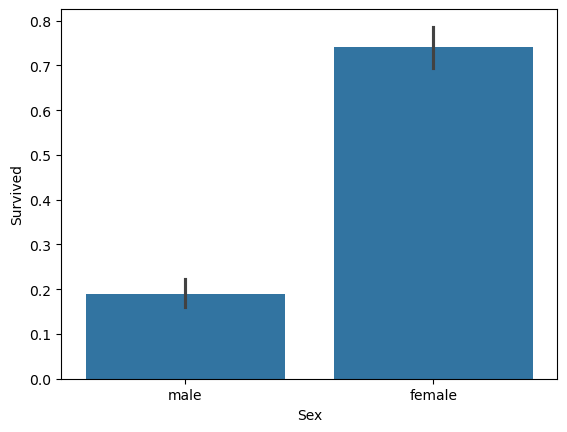

In [35]:
sns.barplot(data=titanic_df, x='Sex',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

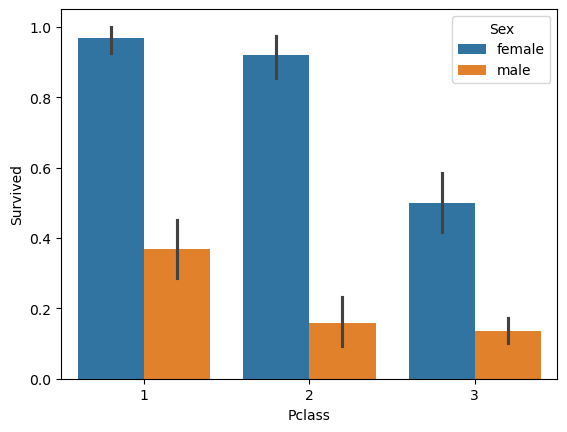

In [36]:
sns.barplot(data=titanic_df,x='Pclass',y='Survived',hue='Sex')

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

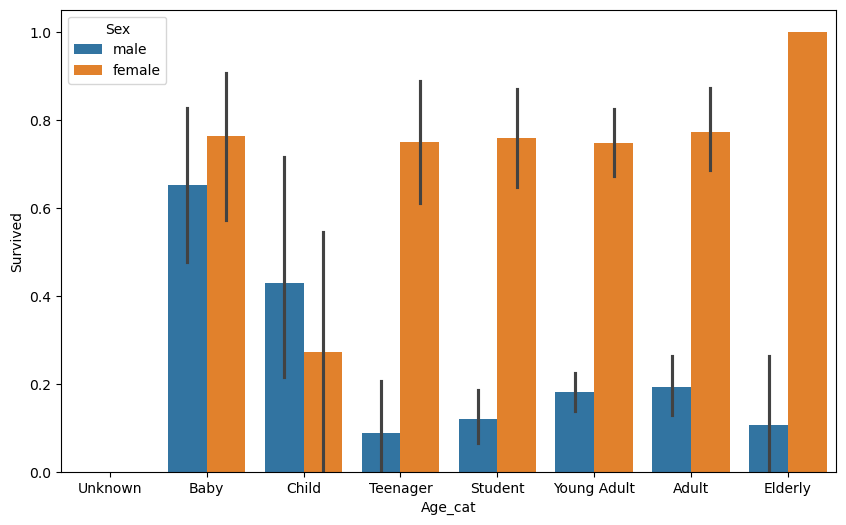

In [40]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat ='Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_categy() 함수를 반환값으로 지정.
# get_category(x)는 입력값으로 'Age' 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order = group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)
